In [1]:
import requests
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas.tools import sjoin
from shapely.geometry import Point

In [2]:
driver = webdriver.Chrome(executable_path=r'C:\Users\Alya\Desktop\4 курс\ПЕ\Selenium\chromedriver.exe')
driver.get("http://www.pogodaiklimat.ru/archive.php?id=ru&region=16")
time.sleep(10)

Извлечение названий метеопунктов

In [3]:
elems=driver.find_elements_by_class_name("big-blue-billet__list_link")
stations=[]
for elem in elems:
    stations.append(elem.text)
    stations2=stations[:25]
print(stations2)
print(type(stations2))
print(len(stations2))

['Азнакаево', 'Аксубаево', 'Акташ', 'Алексеевское', 'Арск', 'Аэропорт Бегишево', 'Бавлы', 'Бегишево', 'Богатые Сабы', 'Большие Кайбицы', 'Бугульма', 'Вязовые', 'Дрожжаное', 'Елабуга', 'Казань', 'Казань аэропорт', 'Камское Устье', 'Лаишево', 'Мензелинск', 'Муслюмово', 'Отарка', 'Тетюши', 'Челны', 'Чистополь', 'Чулпаново']
<class 'list'>
25


Извлечение ссылок на метеопункты

In [4]:
links=[]
elems2 = driver.find_elements_by_xpath("//a[@href]")
for elem in elems2:
    links.append(elem.get_attribute("href"))
#print(links[22:47])
links2=links[22:47]
print(links2)
print(len(links2))

['http://www.pogodaiklimat.ru/weather.php?id=28617', 'http://www.pogodaiklimat.ru/weather.php?id=28608', 'http://www.pogodaiklimat.ru/weather.php?id=28606', 'http://www.pogodaiklimat.ru/weather.php?id=28609', 'http://www.pogodaiklimat.ru/weather.php?id=27593', 'http://www.pogodaiklimat.ru/weather.php?id=27607', 'http://www.pogodaiklimat.ru/weather.php?id=28715', 'http://www.pogodaiklimat.ru/weather.php?id=28603', 'http://www.pogodaiklimat.ru/weather.php?id=28501', 'http://www.pogodaiklimat.ru/weather.php?id=27683', 'http://www.pogodaiklimat.ru/weather.php?id=28711', 'http://www.pogodaiklimat.ru/weather.php?id=27594', 'http://www.pogodaiklimat.ru/weather.php?id=27782', 'http://www.pogodaiklimat.ru/weather.php?id=28506', 'http://www.pogodaiklimat.ru/weather.php?id=27595', 'http://www.pogodaiklimat.ru/weather.php?id=27596', 'http://www.pogodaiklimat.ru/weather.php?id=27696', 'http://www.pogodaiklimat.ru/weather.php?id=27693', 'http://www.pogodaiklimat.ru/weather.php?id=28517', 'http://www

In [5]:
lon=[]
lat=[]
for link in links2:
    url = str(link)
    response = requests.get(url)
    response.encoding = 'utf-8'
    info = []
    soup = BeautifulSoup(response.text, 'lxml')
    coords = soup.find('div', class_='archive-text')
    for coord in coords.find_all('span'):
        info.append(coord.text)
    lon.append(float(info[2]))
    lat.append(float(info[1]))
print (lon)
print (lat)

#создаём геометрию точек метеостанций
geometry = []
for i in range(0, len(lat)):
    geometry.append(Point(lon[i],lat[i]))
print(type(geometry))
print(len(geometry))

[53.07, 50.78, 52.12, 50.08, 49.87, 52.09, 53.24, 52.1, 50.45, 48.18, 52.8, 48.52, 47.57, 52.05, 49.2, 49.28, 49.25, 49.53, 53.07, 53.2, 51.36, 48.78, 50.9, 50.65, 50.42]
[54.87, 54.83, 55.05, 55.29, 56.08, 55.56, 54.41, 55.57, 56.02, 55.4, 54.63, 55.82, 54.72, 55.77, 55.73, 55.61, 55.21, 55.42, 55.72, 55.32, 55.67, 54.95, 56.28, 55.32, 54.5]
<class 'list'>
25


In [6]:
temp=[]
for link in links2:
    url = str(link)
    data = pd.read_html(url)   
    if len(data[0].index)>1:  #создаём цикл, чтобы обойти пустые датафреймы
        df1 = data[0]
        df2 = data[1] 
        df_col = ['UTC', 'Дата']
        df1.columns = df_col
        df1.drop(axis=0, index=0, inplace=True)
        new_col_names=df2.loc[0,:].tolist()
        new_col_names.pop(0)
        new_col_names.pop(0)
        new_col_names.reverse()
        new_col_names.append("Скорость ветра")
        new_col_names.append("Направление ветра")
        new_col_names.reverse()
        df2.columns=new_col_names
        df2.drop(axis=0, index=0, inplace=True)
        df2["Т(С)"]=df2["Т(С)"].astype("float")
        df_all=pd.concat([df1,df2],axis=1)
        #print (df_all)
        latest = df_all.tail(1)
        #print (latest)
        value = latest.loc[:,'Т(С)']
        temp.append(float(value))
    else:
        zero_el=(links2.index(link)) #узнаём индекс станций с нулевыми данными
        print(zero_el)
print (temp)
print(type(temp))
print(len(temp))

7
[7.3, 7.7, 12.2, 6.8, 13.1, 15.0, 21.3, 3.8, 12.3, 13.0, 13.9, 13.1, 9.9, 15.5, 11.0, 17.5, 12.9, 14.0, 10.2, 19.0, 13.5, 3.4, 10.8, 11.6]
<class 'list'>
24


In [7]:
del stations2[7]
print(stations2)
print(len(stations2))

['Азнакаево', 'Аксубаево', 'Акташ', 'Алексеевское', 'Арск', 'Аэропорт Бегишево', 'Бавлы', 'Богатые Сабы', 'Большие Кайбицы', 'Бугульма', 'Вязовые', 'Дрожжаное', 'Елабуга', 'Казань', 'Казань аэропорт', 'Камское Устье', 'Лаишево', 'Мензелинск', 'Муслюмово', 'Отарка', 'Тетюши', 'Челны', 'Чистополь', 'Чулпаново']
24


In [8]:
del geometry[7]
print(geometry)
print(len(geometry))

[<shapely.geometry.point.Point object at 0x000001C381E342B0>, <shapely.geometry.point.Point object at 0x000001C382AE7C40>, <shapely.geometry.point.Point object at 0x000001C381B8F1F0>, <shapely.geometry.point.Point object at 0x000001C381E341F0>, <shapely.geometry.point.Point object at 0x000001C381E34130>, <shapely.geometry.point.Point object at 0x000001C381E341C0>, <shapely.geometry.point.Point object at 0x000001C381E34250>, <shapely.geometry.point.Point object at 0x000001C381E34400>, <shapely.geometry.point.Point object at 0x000001C381E34490>, <shapely.geometry.point.Point object at 0x000001C381E344F0>, <shapely.geometry.point.Point object at 0x000001C381E34550>, <shapely.geometry.point.Point object at 0x000001C381E345B0>, <shapely.geometry.point.Point object at 0x000001C381E34610>, <shapely.geometry.point.Point object at 0x000001C381E34670>, <shapely.geometry.point.Point object at 0x000001C381E346D0>, <shapely.geometry.point.Point object at 0x000001C381E34730>, <shapely.geometry.point

In [9]:
dict_df = {}
dict_df['STATIONS'] = stations2
dict_df['TEMPERATURE'] = temp
dict_df['GEOMETRY'] = geometry

gdf = gpd.GeoDataFrame(dict_df, crs="EPSG:4326")

<ipython-input-9-50244a940b98>:6: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf = gpd.GeoDataFrame(dict_df, crs="EPSG:4326")


In [10]:
gdf

,STATIONS,TEMPERATURE,GEOMETRY
0,Азнакаево,7.3,POINT (53.07 54.87)
1,Аксубаево,7.7,POINT (50.78 54.83)
2,Акташ,12.2,POINT (52.12 55.05)
3,Алексеевское,6.8,POINT (50.08 55.29)
4,Арск,13.1,POINT (49.87 56.08)
5,Аэропорт Бегишево,15.0,POINT (52.09 55.56)
6,Бавлы,21.3,POINT (53.24 54.41)
7,Богатые Сабы,3.8,POINT (50.45 56.02)
8,Большие Кайбицы,12.3,POINT (48.18 55.4)
9,Бугульма,13.0,POINT (52.8 54.63)


In [11]:
shp = gpd.read_file('Tatarstan.shp')

AttributeError: 'str' object has no attribute 'is_geographic'

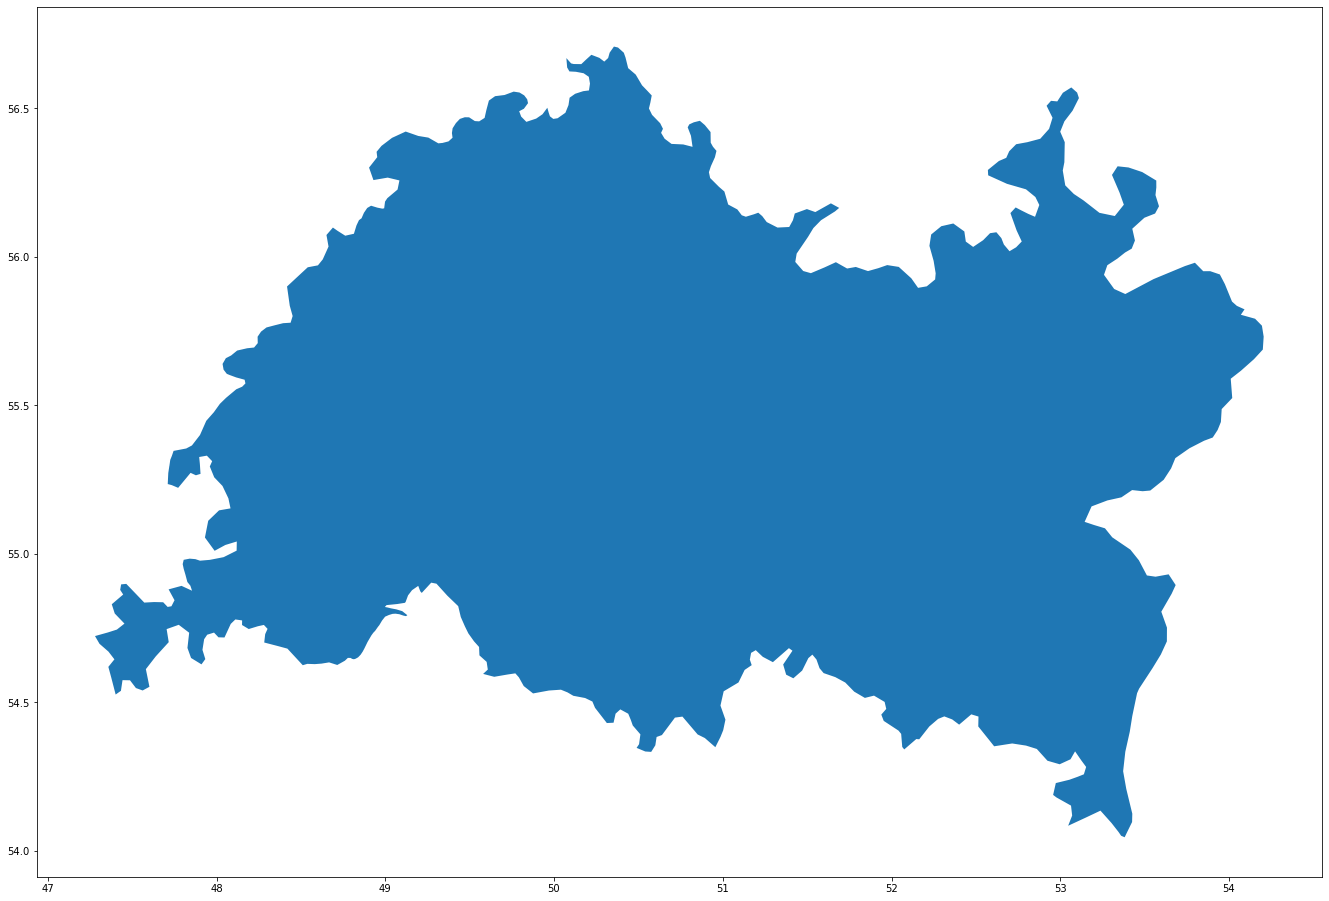

In [12]:
fig, ax1 = plt.subplots(1, figsize = (30,16))
shp.plot(ax=ax1)
st = gdf.plot(ax=ax1)
#gdf.apply(lambda x: st.annotate(s=x.TEMPERATURE, xy=x.geometry.coords[0], xytext=[0,-15], textcoords='offset points', ha='center'),axis=1);
#gdf.apply(lambda x: st.annotate(s=x.STATIONS, xy=x.geometry.coords[0], xytext=[0,10], textcoords='offset points', ha='center'),axis=1);
plt.title('Актуальная погода в Татарстане', fontsize=15, fontweight='bold')
fig.savefig(str('TEMP_Dagestan'))
plt.show();